<a href="https://colab.research.google.com/github/DavoodSZ1993/Dive_into_Deep_Learning/blob/main/14_5_multiscale_object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install d2l==1.0.0-alpha1.post0 --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.0/93.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 36.9 MB/s eta 0:00:00


## 14.5 Multiscale Object Detection

### 14.5.1 Multiscale Anchor Boxes

In [3]:
%matplotlib inline
import torch
from d2l import torch as d2l

In [5]:
from PIL import Image
import torchvision.transforms as T


img = Image.open('catdog.jpg')
#d2l.plt.imshow(img)
aug = T.Compose([T.Resize((561, 728)),
                 T.ToTensor()])
img = aug(img)
h, w = img.shape[1:]
h, w

(561, 728)

In [6]:
def display_anchors(fmap_w, fmap_h, s):
  d2l.set_figsize()
  fmap = torch.zeros((1, 10, fmap_h, fmap_w))
  anchors = d2l.multibox_prior(fmap, sizes=s, ratios=[1, 2, 0.5])
  bbox_scale = torch.tensor((w, h, w, h))
  d2l.show_bboxes(d2l.plt.imshow(img.permute(1, 2, 0).detach().numpy()).axes,
                  anchors[0] * bbox_scale)


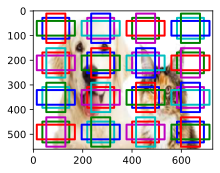

In [7]:
display_anchors(fmap_w=4, fmap_h=4, s=[0.15])

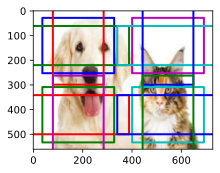

In [9]:
display_anchors(fmap_w=2, fmap_h=2, s=[0.4])

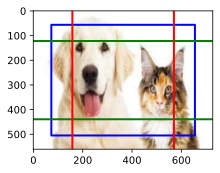

In [10]:
display_anchors(fmap_w=1, fmap_h=1, s=[0.8])